In [ ]:
pip install openpyxl

In [ ]:
pip install soynlp emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 32.1 MB/s eta 0:00:00


In [ ]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

def clean(x):
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

data = pd.read_csv("/content/drive/MyDrive/데이터과학/week14/test_data_set.csv", encoding="utf-8")
print('total samples : ', len(data))

total samples :  11979


In [ ]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


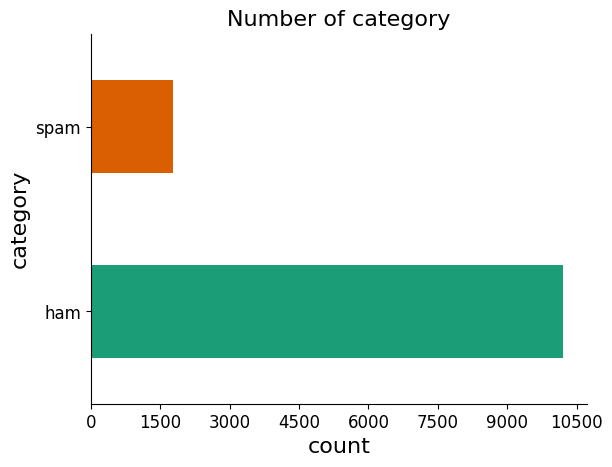

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

values = data["v1"].value_counts()
values.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title("Number of category", fontsize=16)
plt.xlabel("count", fontsize=16)
plt.ylabel("category", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

<ipython-input-65-100415b19030>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['v1'] = data['v1'].replace(['ham','spam'],[0,1])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


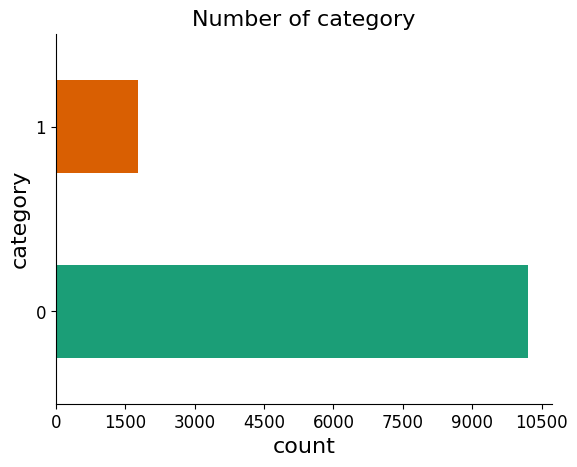

In [ ]:
values = data["v1"].value_counts()
values.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title("Number of category", fontsize=16)
plt.xlabel("count", fontsize=16)
plt.ylabel("category", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
print('결측값 여부 :',data.isnull().values.any())
print('v2열의 유니크한 값 :',data['v2'].nunique())
data.drop_duplicates(subset=['v2'], inplace=True)
print('총 샘플의 수 :',len(data))

결측값 여부 : False
v2열의 유니크한 값 : 10859
총 샘플의 수 : 10859


In [ ]:
spam = data['v1'].value_counts()[1]
ham = data['v1'].value_counts()[0]
print(spam, ham)

1669 9190


In [ ]:
print('ham과 spam의 개수')
print(data.groupby('v1').size().reset_index(name='count'))

ham과 spam의 개수
   v1  count
0   0   9190
1   1   1669


In [ ]:
ham_ratio = round(spam/len(data)*100,3)
spam_ratio = round(ham/len(data)*100,3)
print(ham_ratio)
print(spam_ratio)

print(f'정상 문자 비율 = {round(data["v1"].value_counts()[0]/len(data) * 100,3)}%')
print(f'스팸 문자 비율 = {round(data["v1"].value_counts()[1]/len(data) * 100,3)}%')

15.37
84.63
정상 문자 비율 = 84.63%
스팸 문자 비율 = 15.37%


In [ ]:
X_data = data['v2']
y_data = data['v1']
print('문자열 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

문자열 본문의 개수: 10859
레이블의 개수: 10859


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)
print(X_train.shape)
print(y_train.shape)

(8687,)
(8687,)


In [ ]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 문자 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 문자 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 문자 = 84.632%
스팸 문자 = 15.368%


In [ ]:
print('--------테스트 데이터의 비율-----------')
print(f'정상 문자 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 문자 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
정상 문자 = 84.622%
스팸 문자 = 15.378%


In [ ]:
print('--------훈련 데이터-----------')
print(X_train[:10])
print('--------테스트 데이터-----------')
print(X_test[:10])

--------훈련 데이터-----------
9723                                           랄로 왜 메랜 안함?
10927                                 역시 색다른 메뉴가 있으면 좋은듯..
2710     Hope you enjoyed your new content. text stop t...
7895                                    t1 경기 사이에 보는게 맛있긴해
8028     ㅋㅋㅋ어릴땐 그래도 통일해야지 이거였는데 일하고보니까 지금도 세금내기 ㅈ같은데 태도...
2838     Easy mate, * guess the quick drink was bit amb...
7499                                                치감대 ㅎㅇ
6320                        디지털 카메라의 기준은 하나다! 캐논인가 캐논이 아닌가
6402                                      PC는 달라도 모니터는 샘트론
761      We are at grandmas. Oh dear, u still ill? I fe...
Name: v2, dtype: object
--------테스트 데이터-----------
10934            26살에 창업하기 쉽제 않은대 대단하시네요. 나중에 꼭 한번 방문 할게요!
3447     Its  &lt;#&gt; k here oh. Should i send home f...
2471                 sry can't talk on phone, with parents
6631                              에헤에 암살부분 나레이션 맘에등어서 구독!!
1288                              Happy new year to u too!
6312                                  

In [ ]:
X_train = [clean(x) for x in X_train]

In [ ]:
print(X_train[:10])
print(y_train[:10])

['랄로 왜 메랜 안함?', '역시 색다른 메뉴가 있으면 좋은듯..', 'Hope you enjoyed your new content. text stop to 61610 to unsubscribe. help:08712400602450p Provided by tones2you.co.uk', 't1 경기 사이에 보는게 맛있긴해', 'ㅋㅋㅋ어릴땐 그래도 통일해야지 이거였는데 일하고보니까 지금도 세금내기 ㅈ같은데 태도도 ㅈ같네 하면서 안하는게ㅋㅋㅌ걍 쏴', 'Easy mate, * guess the quick drink was bit ambitious.', '치감대 ㅎㅇ', '디지털 카메라의 기준은 하나다! 캐논인가 캐논이 아닌가', 'PC는 달라도 모니터는 샘트론', 'We are at grandmas. Oh dear, u still ill? I felt Shit this morning but i think i am just hungover! Another night then. We leave on sat.']
9723     0
10927    0
2710     1
7895     0
8028     0
2838     0
7499     0
6320     1
6402     1
761      0
Name: v1, dtype: int64


In [ ]:
X_test = [clean(x) for x in X_test]

In [ ]:
print(X_test[:10])
print(y_test[:10])

['26살에 창업하기 쉽제 않은대 대단하시네요. 나중에 꼭 한번 방문 할게요!', 'Its &lt;#&gt; k here oh. Should i send home for sale.', "sry can't talk on phone, with parents", '에헤에 암살부분 나레이션 맘에등어서 구독!!', 'Happy new year to u too!', '한번만 씻어봐도 아는 깨끗함', 'All day working day:)except saturday and sunday..', 'URGENT! Your mobile number *************** WON a 2000 Bonus Caller prize on 10/06/03! This is the 2nd attempt to reach you! Call 09066368753 ASAP! Box 97N7QP, 150ppm', 'I see the letter B on my car', 'Hi, wkend ok but journey terrible. Wk not good as have huge back log of marking to do']
10934    0
3447     0
2471     0
6631     0
1288     0
6312     1
3468     0
2327     1
37       0
2285     0
Name: v1, dtype: int64


문장의 최대 길이 : 790
문장의 평균 길이 : 52.41257050765512


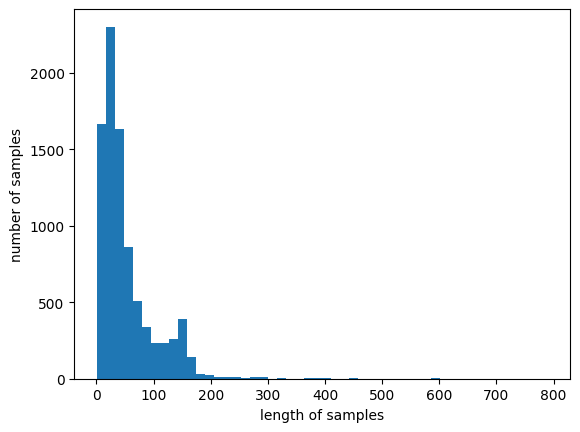

In [ ]:
print('문장의 최대 길이 :',max(len(review) for review in X_train))
print('문장의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

문장의 최대 길이 : 910
문장의 평균 길이 : 54.8195211786372


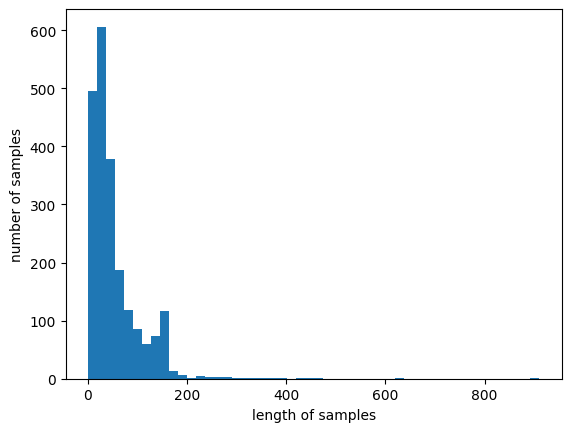

In [ ]:
print('문장의 최대 길이 :',max(len(review) for review in X_test))
print('문장의 평균 길이 :',sum(map(len, X_test))/len(X_test))
plt.hist([len(review) for review in X_test], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 128
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 128 이하인 샘플의 비율: 89.45550823068955


In [ ]:
max_len = 128
below_threshold_len(max_len, X_test)

전체 샘플 중 길이가 128 이하인 샘플의 비율: 88.95027624309392


In [ ]:
pip install konlpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 38.8 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
from tqdm import tqdm

okt = Okt()

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
X_train_tokenize = []
for sentence in tqdm(X_train):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train_tokenize.append(stopwords_removed_sentence)

100%|██████████| 8687/8687 [00:12<00:00, 712.24it/s]


In [ ]:
X_test_tokenize = []
for sentence in tqdm(X_test):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test_tokenize.append(stopwords_removed_sentence)


100%|██████████| 2172/2172 [00:03<00:00, 682.81it/s]


In [ ]:
print(len(X_train_tokenize))
print(len(X_test_tokenize))

8687
2172


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_tokenize)

In [ ]:
print(tokenizer.word_index)

# 15541개

{'.': 1, 'i': 2, 'you': 3, 'to': 4, '?': 5, ',': 6, "'": 7, '!': 8, '...': 9, 'a': 10, 'the': 11, 'u': 12, 'and': 13, '..': 14, 'in': 15, '2': 16, 'is': 17, 'me': 18, 'ㅋㅋ': 19, 'it': 20, '을': 21, 'my': 22, 'for': 23, 'your': 24, 's': 25, 'that': 26, 'of': 27, '보다': 28, 'have': 29, '&': 30, 't': 31, 'call': 32, 'on': 33, 'are': 34, 'so': 35, 'can': 36, 'm': 37, 'now': 38, '에서': 39, 'not': 40, 'but': 41, 'we': 42, '1': 43, '있다': 44, 'or': 45, 'at': 46, '4': 47, '진짜': 48, 'with': 49, 'do': 50, '롤': 51, '되다': 52, 'be': 53, ';': 54, 'get': 55, 'will': 56, 'if': 57, '이다': 58, 'just': 59, 'no': 60, '로': 61, '다': 62, 'ur': 63, 'this': 64, 'how': 65, '-': 66, 'up': 67, '같다': 68, '없다': 69, '지노': 70, 'go': 71, 'gt': 72, 'lt': 73, 'what': 74, '좋다': 75, '~': 76, 'when': 77, '아니다': 78, 'from': 79, 'out': 80, 'ok': 81, 'free': 82, 'know': 83, 'all': 84, ';#&': 85, 'll': 86, 'like': 87, '안': 88, 'am': 89, '/': 90, 'got': 91, 'good': 92, '라': 93, 'then': 94, 'day': 95, 'there': 96, '만': 97, 'he': 98, '

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 15541
등장 빈도가 2번 이하인 희귀 단어의 수: 10689
단어 집합에서 희귀 단어의 비율: 68.77935782768162
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.431588466432453


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)


단어 집합의 크기 : 4854


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train_tokenize)
X_train = tokenizer.texts_to_sequences(X_train_tokenize)
X_test = tokenizer.texts_to_sequences(X_test_tokenize)



In [ ]:
print(X_train[:3])
print(X_test[:3])

[[244, 175, 1, 2408, 6], [488, 1, 3175, 45, 76, 531, 15], [233, 4, 1, 25, 172, 1489, 2, 115, 151, 5, 1, 5, 1285, 2, 417, 114, 1, 147, 1, 132, 1]]
[[2809, 1082, 2530, 517, 306, 169, 466, 2, 2395, 924, 379, 1, 9], [105, 31, 74, 86, 73, 55, 137, 183, 194, 2, 237, 3, 139, 138, 24, 3312, 2], [1, 37, 8, 32, 492, 34, 202, 7, 50, 2164]]


In [ ]:

print("y_train : ",y_train[:15])

print("y_test : ",y_test[:15])


y_train :  9723     0
10927    0
2710     1
7895     0
8028     0
2838     0
7499     0
6320     1
6402     1
761      0
8366     0
11748    0
3790     1
5593     1
144      0
Name: v1, dtype: int64
y_test :  10934    0
3447     0
2471     0
6631     0
1288     0
6312     1
3468     0
2327     1
37       0
2285     0
6856     0
4949     0
1365     1
4645     1
9217     0
Name: v1, dtype: int64


문장의 최대 길이 : 207
문장의 평균 길이 : 14.38436744560838


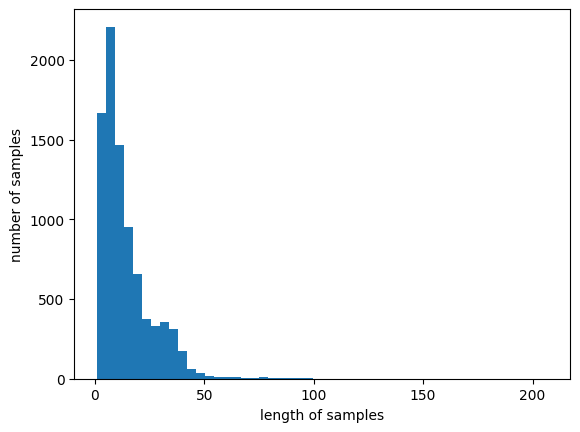

In [ ]:
print('문장의 최대 길이 :',max(len(review) for review in X_train))
print('문장의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))


In [ ]:
max_len = 50
below_threshold_len(max_len, X_train)


전체 샘플 중 길이가 50 이하인 샘플의 비율: 98.90641187982042


In [ ]:
max_len = 50

X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

print("X_train 데이터 타입:", type(X_train))
print("X_train 데이터 Shape:", X_train.shape)
print("X_train 샘플 일부:", X_train[:5])

print("X_test 데이터 타입:", type(X_test))
print("X_test 데이터 Shape:", X_test.shape)
print("X_test 샘플 일부:", X_test[:5])

X_train 데이터 타입: <class 'numpy.ndarray'>
X_train 데이터 Shape: (8687, 50)
X_train 샘플 일부: [[ 244  175    1 2408    6    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [ 488    1 3175   45   76  531   15    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [ 233    4    1   25  172 1489    2  115  151    5    1    5 1285    2
   417  114    1  147    1  132    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  32   44  326 3176   29  397    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Flatten, Dropout, GlobalAveragePooling1D, BatchNormalization, Activation, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras import initializers
import tensorflow as tf

embedding_dim = 32
num_classes = 1
vocab_sizes = 4854

# Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01),
#                        dropout=0.2, recurrent_dropout=0.2))

# 모델 생성
model = Sequential([
    Embedding(input_dim=vocab_sizes, output_dim=embedding_dim),
    LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    LSTM(64, return_sequences=True,  dropout=0.2, recurrent_dropout=0.2),
    Flatten(),
    Dense(64, activation='swish'),
    Dropout(0.3),
    Dense(32, activation='swish'),
    Dense(num_classes, activation='sigmoid')
])



In [ ]:
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=3)
optimizer = tf.keras.optimizers.AdamW(
    learning_rate=2e-4,  # 학습률
    weight_decay=0.01    # weight decay (L2 regularization)
)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-8)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, batch_size=8, callbacks=[es,lr],
                    shuffle=True, validation_split=0.2, validation_freq=1)

Epoch 1/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 104s 115ms/step - acc: 0.8601 - loss: 0.3865 - val_acc: 0.9522 - val_loss: 0.1772 - learning_rate: 2.0000e-04
Epoch 2/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 100s 115ms/step - acc: 0.9542 - loss: 0.1391 - val_acc: 0.9626 - val_loss: 0.1179 - learning_rate: 2.0000e-04
Epoch 3/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 99s 114ms/step - acc: 0.9734 - loss: 0.0830 - val_acc: 0.9638 - val_loss: 0.1153 - learning_rate: 2.0000e-04
Epoch 4/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 99s 114ms/step - acc: 0.9838 - loss: 0.0478 - val_acc: 0.9643 - val_loss: 0.1088 - learning_rate: 2.0000e-04
Epoch 5/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 100s 115ms/step - acc: 0.9883 - loss: 0.0354 - val_acc: 0.9643 - val_loss: 0.1851 - learning_rate: 2.0000e-04
Epoch 6/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 100s 116ms/step - acc: 0.9927 - loss: 0.0263 - val_acc: 0.9649 - val_loss: 0.1465 - learning_rate: 2.0000e-04
Epoch 7/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 100s 115ms/step - acc: 0.9922 - loss: 0.0211 - val_acc: 0.9620

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 50, 32)              │         155,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,260,485 (4.81 MB)

 Trainable params: 420,161 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 840,324 (3.21 MB)

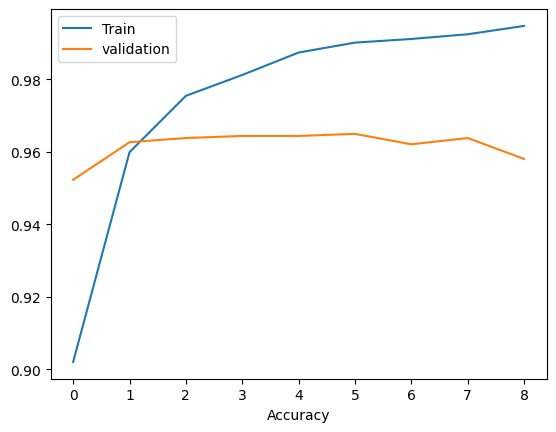

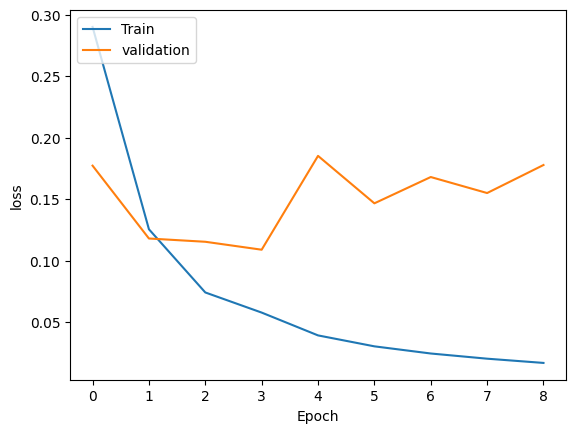

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Flatten, Dropout, GlobalAveragePooling1D, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras import initializers
import tensorflow as tf

embedding_dim = 32
num_classes = 1
vocab_sizes = 4854

# Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01),
#                        dropout=0.2, recurrent_dropout=0.2))

# 모델 생성
model = Sequential([
    Embedding(input_dim=vocab_sizes, output_dim=embedding_dim),
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)), # 시퀀스 유지
    Flatten(),
    Dense(32, kernel_initializer='he_normal'),
    BatchNormalization(),
    Activation('swish'),
    Dense(num_classes, activation='sigmoid')
])


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
optimizer = tf.keras.optimizers.AdamW(
    learning_rate=2e-4,  # 학습률
    weight_decay=0.01    # weight decay (L2 regularization)
)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-8)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=8, callbacks=[es, lr],
                    shuffle=True, validation_split=0.2, validation_freq=1)

Epoch 1/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - acc: 0.7812 - loss: 0.4937 - val_acc: 0.9511 - val_loss: 0.2558 - learning_rate: 2.0000e-04
Epoch 2/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 69s 80ms/step - acc: 0.9464 - loss: 0.2028 - val_acc: 0.9666 - val_loss: 0.1383 - learning_rate: 2.0000e-04
Epoch 3/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 69s 80ms/step - acc: 0.9654 - loss: 0.1353 - val_acc: 0.9603 - val_loss: 0.1361 - learning_rate: 2.0000e-04
Epoch 4/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 69s 80ms/step - acc: 0.9675 - loss: 0.1050 - val_acc: 0.9661 - val_loss: 0.1160 - learning_rate: 2.0000e-04
Epoch 5/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 70s 80ms/step - acc: 0.9800 - loss: 0.0735 - val_acc: 0.9661 - val_loss: 0.1124 - learning_rate: 2.0000e-04
Epoch 6/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 69s 80ms/step - acc: 0.9763 - loss: 0.0702 - val_acc: 0.9620 - val_loss: 0.1226 - learning_rate: 2.0000e-04
Epoch 7/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 69s 80ms/step - acc: 0.9856 - loss: 0.0539 - val_acc: 0.9632 - val_loss:

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 50, 32)              │         155,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 50, 256)             │         164,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         409,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,189,829 (8.35 MB)

 Trainable params: 729,921 (2.78 MB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 1,459,844 (5.57 MB)

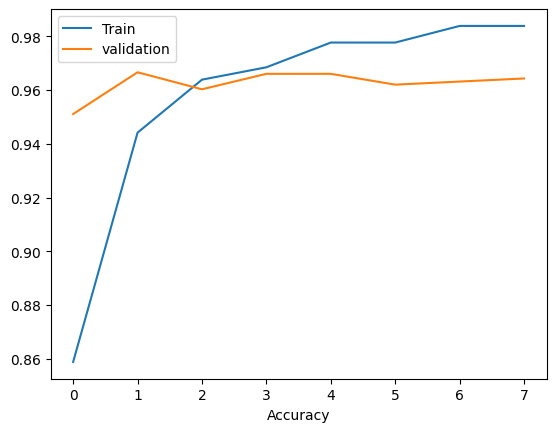

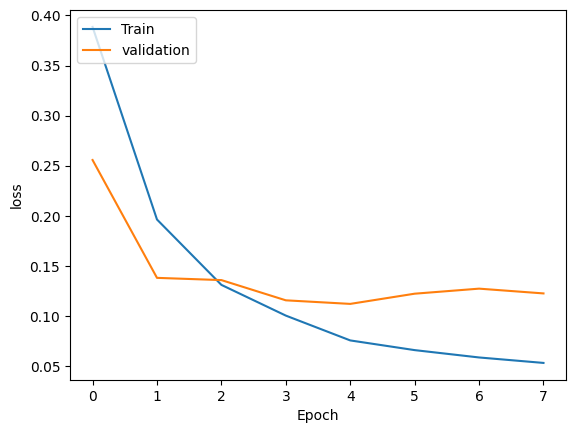

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Flatten, Dropout, GlobalAveragePooling1D, BatchNormalization, Activation, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras import initializers
import tensorflow as tf

embedding_dim = 32
num_classes = 1
vocab_sizes = 4854

# Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01),
#                        dropout=0.2, recurrent_dropout=0.2))

# 모델 생성
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    GRU(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    GRU(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    GlobalAveragePooling1D(),
    Dense(128, kernel_initializer='he_normal'),
    BatchNormalization(),
    Activation('swish'),
    Dense(32, kernel_initializer='he_normal'),
    BatchNormalization(),
    Activation('swish'),
    Dense(num_classes, activation='sigmoid')
])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
optimizer = tf.keras.optimizers.AdamW(
    learning_rate=2e-4,  # 학습률
    weight_decay=0.01    # weight decay (L2 regularization)
)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-8)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=8, callbacks=[es, lr],
                    shuffle=True, validation_split=0.2, validation_freq=1)

Epoch 1/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 128s 141ms/step - acc: 0.6196 - loss: 0.6502 - val_acc: 0.9459 - val_loss: 0.3482 - learning_rate: 2.0000e-04
Epoch 2/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 121s 140ms/step - acc: 0.9139 - loss: 0.2894 - val_acc: 0.9459 - val_loss: 0.2088 - learning_rate: 2.0000e-04
Epoch 3/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 122s 140ms/step - acc: 0.9472 - loss: 0.1908 - val_acc: 0.9471 - val_loss: 0.1907 - learning_rate: 2.0000e-04
Epoch 4/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 121s 140ms/step - acc: 0.9580 - loss: 0.1522 - val_acc: 0.9471 - val_loss: 0.1737 - learning_rate: 2.0000e-04
Epoch 5/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 121s 139ms/step - acc: 0.9594 - loss: 0.1412 - val_acc: 0.9488 - val_loss: 0.2760 - learning_rate: 2.0000e-04
Epoch 6/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 121s 140ms/step - acc: 0.9631 - loss: 0.1101 - val_acc: 0.9638 - val_loss: 0.2086 - learning_rate: 2.0000e-04
Epoch 7/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 120s 138ms/step - acc: 0.9735 - loss: 0.0885 - val_acc: 0.96

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 50, 32)              │         155,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 50, 64)              │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50, 64)              │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,037 (2.43 MB)

 Trainable params: 211,905 (827.75 KB)

 Non-trainable params: 320 (1.25 KB)

 Optimizer params: 423,812 (1.62 MB)

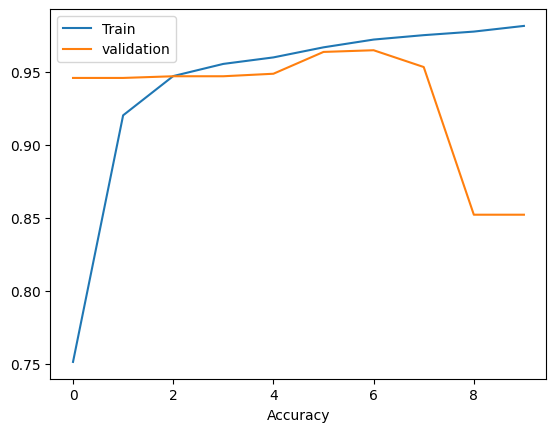

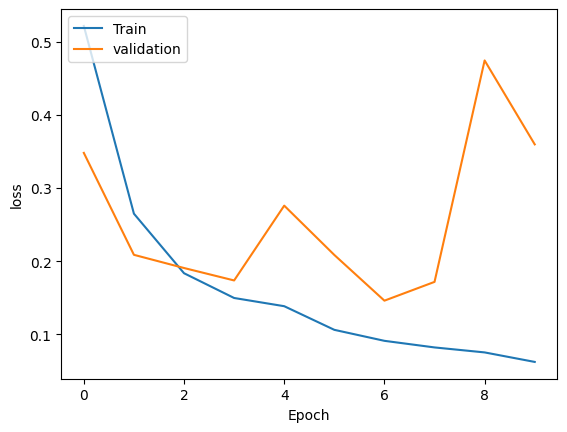

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()